In [190]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../DATA/data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Cleaning

In [191]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [192]:
# Delete kolom tidak relevan
data = data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"], axis=1)

## Outlier Detection

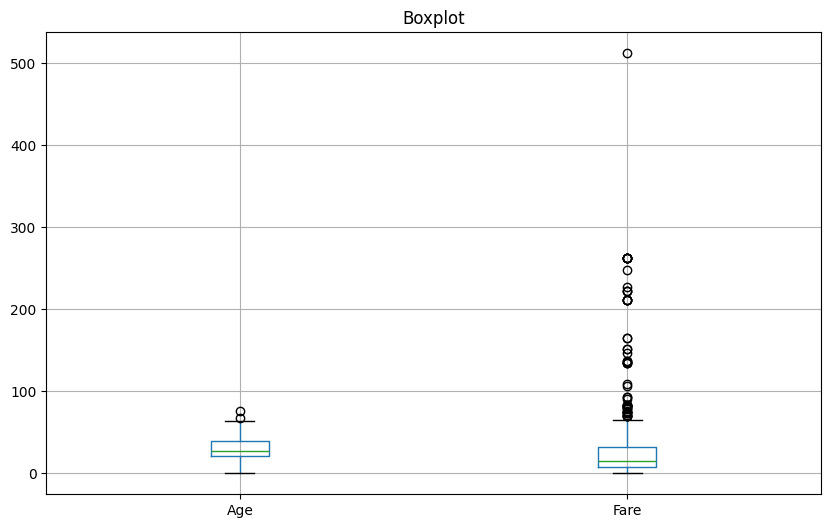

In [193]:
data.boxplot(column=["Age", "Fare"], figsize=(10, 6), grid=True)
plt.title('Boxplot')
plt.show()

## Fill Missing Values

In [194]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data["Fare"].fillna(data["Fare"].median(), inplace=True)

data.isnull().sum()

C:\Users\Arch\AppData\Local\Temp\ipykernel_36844\3862902205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Arch\AppData\Local\Temp\ipykernel_36844\3862902205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Analysis & Encoding Kategorikal

In [195]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [196]:
data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [197]:
data["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [198]:
data["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

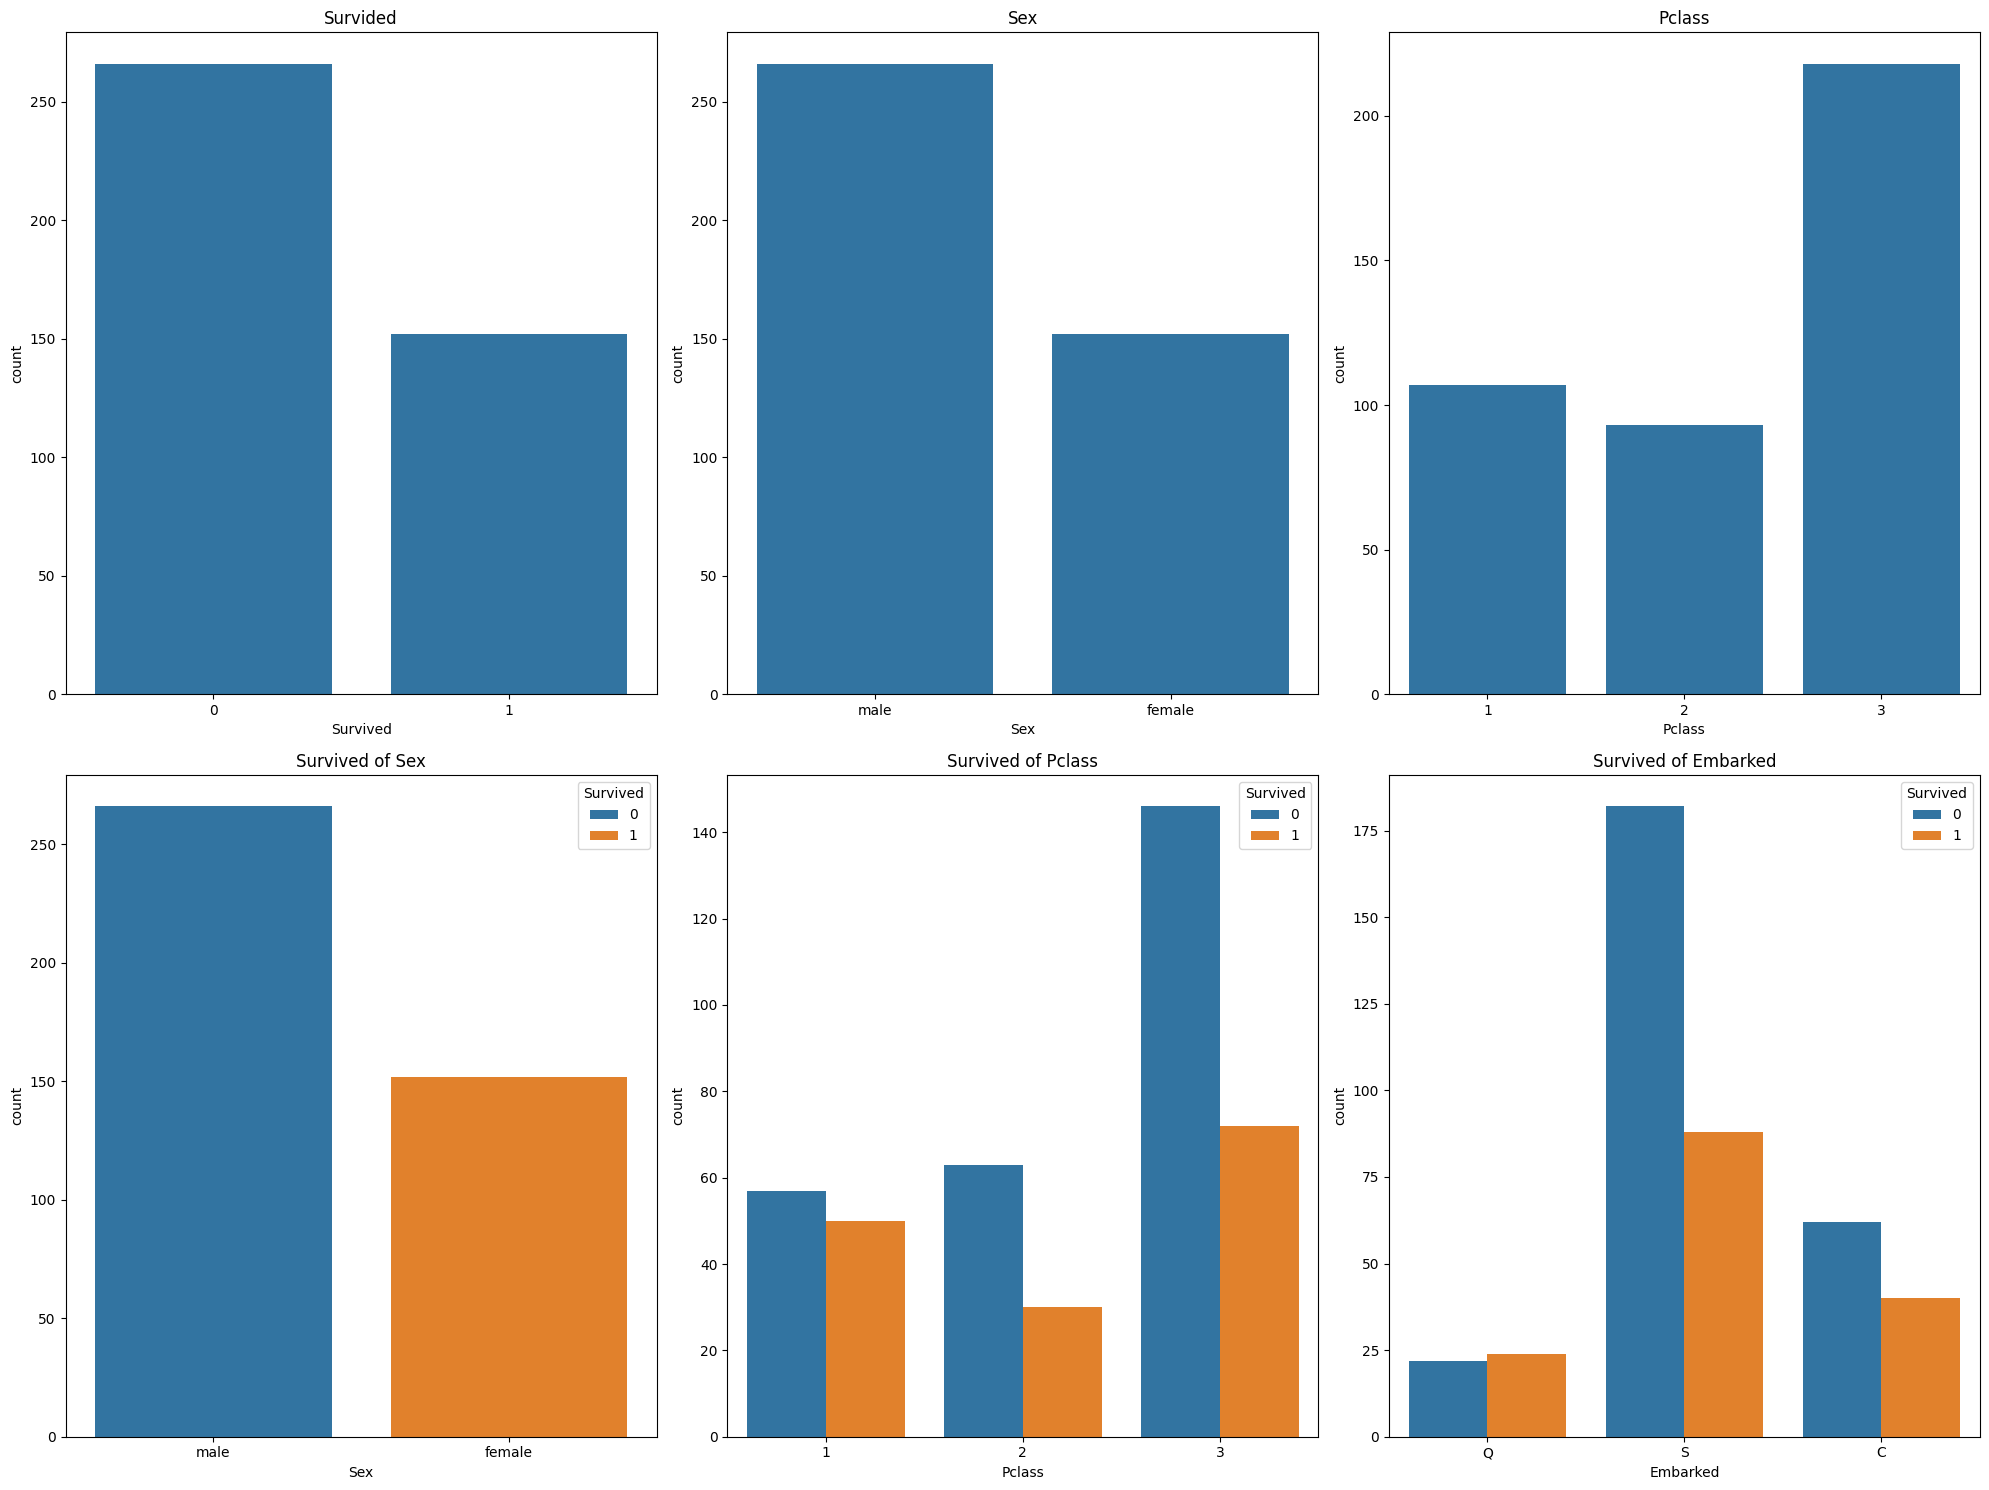

In [199]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(data=data, x='Survived', ax=axes[0])
axes[0].set_title('Survided')

sns.countplot(data=data, x='Sex', ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(data=data, x='Pclass', ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x="Sex", hue="Survived", data=data, ax=axes[3])
axes[3].set_title('Survived of Sex')

sns.countplot(x="Pclass", hue="Survived", data=data, ax=axes[4])
axes[4].set_title('Survived of Pclass')

sns.countplot(x="Embarked", hue="Survived", data=data, ax=axes[5])
axes[5].set_title('Survived of Embarked')

plt.tight_layout()
plt.show()

In [200]:
replacements = {
    "Sex": {"male": 0, "female": 1},
    "Embarked": {"S": 0, "C": 1, "Q": 2}
}

data.replace(replacements, inplace=True)

C:\Users\Arch\AppData\Local\Temp\ipykernel_36844\2036539046.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(replacements, inplace=True)


In [201]:
data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


# Data Scaling & Splitting

In [202]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [203]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [204]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (334, 7)
X_test shape: (84, 7)
y_train shape: (334,)
y_test shape: (84,)


In [206]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification Model

In [207]:
model = GaussianNB()

model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [208]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

print("Train Accuracy (NB): ", accuracy_score(y_train, train_predictions))
print("Test Accuracy (NB): ", accuracy_score(y_test, test_predictions))

Train Accuracy (NB):  1.0
Test Accuracy (NB):  1.0


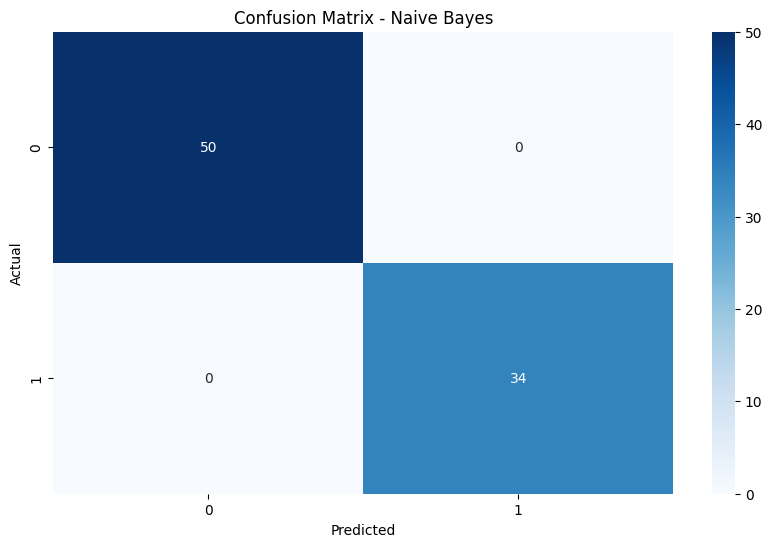

In [209]:
plt.figure(figsize=(10, 6))
cm_nb = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [210]:
print("Confusion Matrix - Naive Bayes:\n")
print(classification_report(y_test, test_predictions))

Confusion Matrix - Naive Bayes:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Cross Validation

In [213]:
cv = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Naive Bayes Cross Validation Accuracy: ", cv.mean(), "+/-", cv.std(),)

print(f"Scores {cv}")
print(f"Mean {cv.mean()}")
print(f"Standard Deviation {cv.std()}")

Naive Bayes Cross Validation Accuracy:  1.0 +/- 0.0
Scores [1. 1. 1. 1. 1.]
Mean 1.0
Standard Deviation 0.0
